In [1]:
# Цели этого документа:
# Возможность перечислить готовые отдельные наборы изображений
# Объединить эти изображения в супер датасет
# Возможность перемешать этот датасет
# Возможность разбить супер датасет на кучу мулепусеньких датасетиков которые могут поместиться в мои 16 гб оперативной памяти
# Эта штука валидна только для генерации датасетов из картинок, векторы и вращения мне не нужны

In [1]:
import numpy as np
import math
import pandas
from matplotlib import pyplot as plt
from PIL import Image
import os

In [2]:
save_path = "\CombinedDatasets"; save_name = "\Part"; 

In [3]:
shared_folder = "BigDataCubes"
dataset_list = ["\Pringle", "\Donut", "\Rubic"]
photos_string = 'Photos.npy'; labels_string = 'Labels.npy'
vectors_string = 'Vectors.npy'; #rotations_string = 'RotationDegrees.npy' Это не нужно, оно говорит как повернут объект
albedos_string = 'Albedos.npy'; normals_string = 'Normals.npy'
masks_string = 'Masks.npy'; depth_string = 'Depth.npy'
fragment_length = 5700
small_fragment_length = 100
number_of_splits = 5

In [5]:
def get_extras_id(index):
    return index // (fragment_length // small_fragment_length)

In [6]:
def get_start_and_end_points(number_of_cuts, total_length):
    break_points = []
    start_point = 0
    fraction = total_length / number_of_cuts
    for i in range(1, number_of_cuts + 1):
        rounded = round(fraction * i) 
        break_points.append((start_point, rounded))
        start_point = rounded
    return break_points

In [7]:
print(shared_folder + dataset_list[0] + dataset_list[0] + photos_string)

BigDataCubes\Pringle\PringlePhotos.npy


In [8]:
# ONLY START ONCE FOR ALL GENERATIONS
indices_list = {}
for i in range(len(dataset_list)):
    name = dataset_list[i]
    indices = np.arange(fragment_length)
    np.random.shuffle(indices)
    indices_list[name] = (indices)
print(indices_list)

{'\\Pringle': array([5504, 5127, 3329, ..., 1667, 4904, 3221]), '\\Donut': array([5602,  354, 4780, ..., 4675, 2276, 5164]), '\\Rubic': array([2862, 5540, 5494, ..., 2185,  831, 4102])}


In [9]:
# ONLY START ONCE FOR ALL GENERATIONS
internal_indicies = []
for i in range(number_of_splits):
    start_index, end_index = get_start_and_end_points(number_of_splits, fragment_length)[i]
    length = end_index - start_index
    inner_indicies_length = length * len(dataset_list)
    inner_indicies = np.arange(inner_indicies_length)
    np.random.shuffle(inner_indicies)
    internal_indicies.append(inner_indicies)
print(internal_indicies)

[array([2608, 1929, 1765, ..., 3371, 2282, 1487]), array([1058, 2097,  679, ...,  134,  544, 1441]), array([1747, 1295, 1179, ..., 1738, 2345, 1400]), array([3277, 1583, 3237, ...,  994,  952, 2006]), array([ 924, 2122, 2658, ...,  189, 2211, 1780])]


In [10]:
def the_super_function(name_string, short_list = False):
    for i in range(number_of_splits):
        start_index, end_index = get_start_and_end_points(number_of_splits, fragment_length)[i]
        print("__NEW__ITERATION__", start_index, end_index)
        length = end_index - start_index
        final_dataset = np.zeros((length * len(dataset_list), 64,64, 3))
        for name_index in range(len(dataset_list)):
            name = dataset_list[name_index]
            print(name)
            local_indices = indices_list[name][start_index : end_index]
            current_dataset = np.load(shared_folder + name + name + name_string)
            if short_list:
                for x in range(len(local_indices)):
                    final_dataset[name_index * length + x] = current_dataset[get_extras_id(local_indices[x])]
            else:
                final_dataset[name_index * length : (name_index + 1) * length] = current_dataset[local_indices]
        final_dataset = final_dataset.astype("float16")
        final_dataset = final_dataset[internal_indicies[i]]
        print("saved")
        np.save(shared_folder + save_path + save_name + str(i) + name_string, final_dataset)
        

In [11]:
def the_super_function_vectors(name_string, short_list = False):
    for i in range(number_of_splits):
        start_index, end_index = get_start_and_end_points(number_of_splits, fragment_length)[i]
        print("__NEW__ITERATION__", start_index, end_index)
        length = end_index - start_index
        final_dataset = np.zeros((length * len(dataset_list), 3))
        for name_index in range(len(dataset_list)):
            name = dataset_list[name_index]
            print(name)
            local_indices = indices_list[name][start_index : end_index]
            current_dataset = np.load(shared_folder + name + name + name_string)
            if short_list:
                for x in range(len(local_indices)):
                    final_dataset[name_index * length + x] = current_dataset[get_extras_id(local_indices[x])]
            else:
                final_dataset[name_index * length : (name_index + 1) * length] = current_dataset[local_indices]
        final_dataset = final_dataset.astype("float16")
        final_dataset = final_dataset[internal_indicies[i]]
        print("saved")
        np.save(shared_folder + save_path + save_name + str(i) + name_string, final_dataset)
        

In [12]:
the_super_function_vectors(vectors_string, short_list=True)

__NEW__ITERATION__ 0 1140
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 1140 2280
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 2280 3420
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 3420 4560
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 4560 5700
\Pringle
\Donut
\Rubic
saved


In [13]:
the_super_function(normals_string, short_list=True)

__NEW__ITERATION__ 0 1140
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 1140 2280
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 2280 3420
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 3420 4560
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 4560 5700
\Pringle
\Donut
\Rubic
saved


In [14]:
the_super_function(masks_string, short_list=True)

__NEW__ITERATION__ 0 1140
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 1140 2280
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 2280 3420
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 3420 4560
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 4560 5700
\Pringle
\Donut
\Rubic
saved


In [15]:
the_super_function(albedos_string, short_list=True)

__NEW__ITERATION__ 0 1140
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 1140 2280
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 2280 3420
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 3420 4560
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 4560 5700
\Pringle
\Donut
\Rubic
saved


In [16]:
the_super_function(photos_string, short_list=False)

__NEW__ITERATION__ 0 1140
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 1140 2280
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 2280 3420
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 3420 4560
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 4560 5700
\Pringle
\Donut
\Rubic
saved


In [17]:
the_super_function(depth_string, short_list=True)

__NEW__ITERATION__ 0 1140
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 1140 2280
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 2280 3420
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 3420 4560
\Pringle
\Donut
\Rubic
saved
__NEW__ITERATION__ 4560 5700
\Pringle
\Donut
\Rubic
saved


[-0.985 -0.017  0.174]


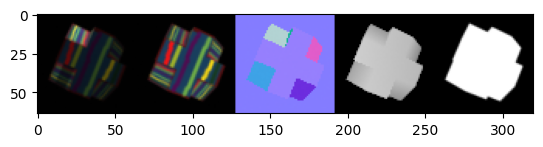

In [11]:
wanted_id = 0;
#print(indices_list["\\Donut"][wanted_id], get_extras_id(indices_list["\\Donut"][wanted_id]))
photos1 = np.load(shared_folder + save_path + save_name + str(0) + photos_string);
photo = photos1[wanted_id]; 
photos1 = np.load(shared_folder + save_path + save_name + str(0) + normals_string);
normal = photos1[wanted_id]; 
photos1 = np.load(shared_folder + save_path + save_name + str(0) + masks_string);
mask =  photos1[wanted_id]; 
photos1 = np.load(shared_folder + save_path + save_name + str(0) + albedos_string);
albedo = photos1[wanted_id]; 
photos1 = np.load(shared_folder + save_path + save_name + str(0) + depth_string);
depth =  photos1[wanted_id]; 
vectors1 = np.load(shared_folder + save_path + save_name + str(0) + vectors_string);
print(vectors1[wanted_id])
combined = np.concatenate([photo, albedo, normal, depth, mask], axis = 1).astype("float32")
plt.imshow(combined); del photos1

[-0.985 -0.017  0.174]


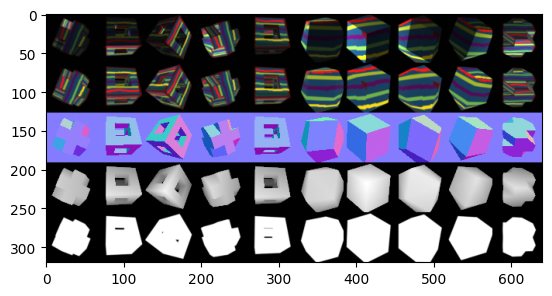

In [20]:
wanted_id = 0;
#print(indices_list["\\Donut"][wanted_id], get_extras_id(indices_list["\\Donut"][wanted_id]))
photos1 = np.load(shared_folder + save_path + save_name + str(0) + photos_string);
photo = np.concatenate( photos1[0:10], axis = 1); 
photos1 = np.load(shared_folder + save_path + save_name + str(0) + normals_string);
normal = np.concatenate( photos1[0:10], axis = 1);
photos1 = np.load(shared_folder + save_path + save_name + str(0) + masks_string);
mask =  np.concatenate( photos1[0:10], axis = 1);
photos1 = np.load(shared_folder + save_path + save_name + str(0) + albedos_string);
albedo = np.concatenate( photos1[0:10], axis = 1);
photos1 = np.load(shared_folder + save_path + save_name + str(0) + depth_string);
depth = np.concatenate( photos1[0:10], axis = 1); 
vectors1 = np.load(shared_folder + save_path + save_name + str(0) + vectors_string);
print(vectors1[wanted_id])
combined = np.concatenate([photo, albedo, normal, depth, mask], axis = 0).astype("float32")
plt.imshow(combined); del photos1

In [21]:
combined = np.round(combined * 255, 0).astype(np.uint8)

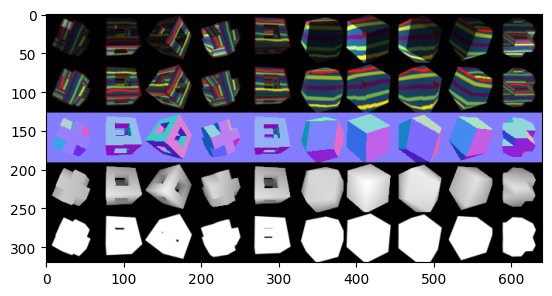

In [22]:
plt.imshow(combined);

In [26]:
c_image = Image.fromarray(combined)
c_image.save("my_beautiful_image.png")